In [1]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
grid = np.zeros((4,4)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


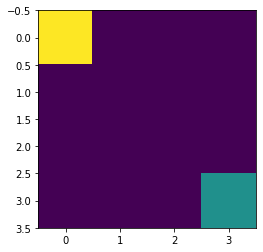

In [3]:
pos1 = [0,0] #start position of our agent
pos2 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

plt.imshow(grid)

In [4]:
class GridEnvironment(gym.Env):
    metadata = {'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.done = False
        self.timestep = 0

    def reset(self):
        self.state = np.zeros((4, 4))
        self.done = False
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1  # Initial agent position
        self.state[tuple(self.goal_pos)] = 0.5  # Goal position

        self.rocks = [(0, 3), (1, 2)]  # Rocks positions
        for rock_pos in self.rocks:
            self.state[rock_pos] = -1  # Rocks as negative rewards

        self.rewards = [(2, 1), (2, 2)]  # Rewards positions
        for reward_pos in self.rewards:
            self.state[reward_pos] = 2  # Positive rewards at reward positions

        observation = self.state.flatten()
        return observation

    def step(self, action):
        if action == 0:  # Down
            self.agent_pos[0] += 1
        elif action == 1:  # Up
            self.agent_pos[0] -= 1
        elif action == 2:  # Right
            self.agent_pos[1] += 1
        elif action == 3:  # Left
            self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        for rock_pos in self.rocks:
            self.state[rock_pos] = -1

        for reward_pos in self.rewards:
            self.state[reward_pos] = 2 

        observation = self.state.flatten()

        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 15
            self.done = True
        elif tuple(self.agent_pos) in self.rocks:
            if tuple(self.agent_pos) == (0, 3):
                reward = -3  
            elif tuple(self.agent_pos) == (1, 2):
                reward = -2 
        elif tuple(self.agent_pos) in self.rewards:
            if tuple(self.agent_pos) == (2, 1):
                reward = 2
            elif tuple(self.agent_pos) == (2, 2):
                reward = 4 

        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False

        agentState = self.agent_pos
        isDone = self.done
        timestepCount = self.timestep

        return observation, reward, terminated, agentState, isDone, timestepCount

    def render(self):
        plt.title('Grid World')

        # Visualize rocks as red color
        for rock_pos in self.rocks:
            plt.scatter(rock_pos[1], rock_pos[0], color='red', marker='s', s=300)

        # Visualize rewards as orange color
        for reward_pos in self.rewards:
            plt.scatter(reward_pos[1], reward_pos[0], color='orange', marker='P', s=300)

        # Visualize agent as green color
        plt.scatter(self.agent_pos[1], self.agent_pos[0], color='green', marker='o', s=300)

        # Visualize the goal as blue color
        plt.scatter(self.goal_pos[1], self.goal_pos[0], color='blue', marker='*', s=300)
        plt.imshow(self.state)
        plt.show()

In [5]:
actionsEquivalent = {0:'Down', 1:'Up', 2:'Right', 3:'Left'}
statesEquivalent = {(0,0):'S1', (0,1):'S2', (0,2):'S3', (0,3):'S4', (1,0):'S5', (1,1):'S6', (1,2):'S7', 
                    (1,3):'S8',(2,0):'S9',(2,1):'S10',(2,2):'S11', (2,3):'S12', (3,0):'S13', (3,1):'S14', 
                    (3,2):'S15', (3,3):'S16'}

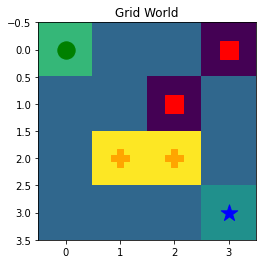

In [6]:
env = GridEnvironment()

obs = env.reset()
env.render()

In [7]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

Timestep: 1

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


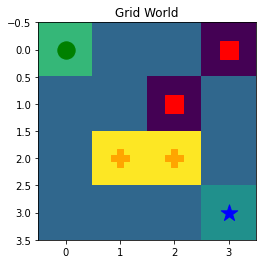

Timestep: 2

Current State: S5 = (1, 0) | Action = Down | Reward = 0 | Done = False | Terminated:False


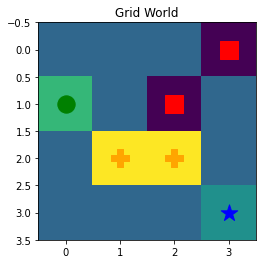

Timestep: 3

Current State: S6 = (1, 1) | Action = Right | Reward = 0 | Done = False | Terminated:False


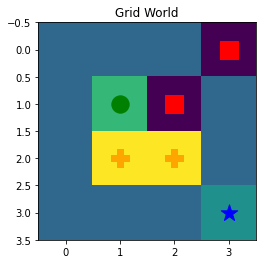

Timestep: 4

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


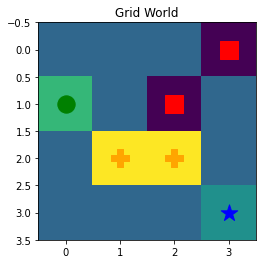

Timestep: 5

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


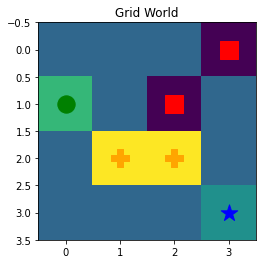

Timestep: 6

Current State: S6 = (1, 1) | Action = Right | Reward = 0 | Done = False | Terminated:False


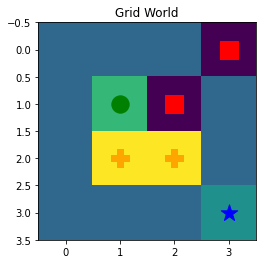

Timestep: 7

Current State: S7 = (1, 2) | Action = Right | Reward = -2 | Done = False | Terminated:False


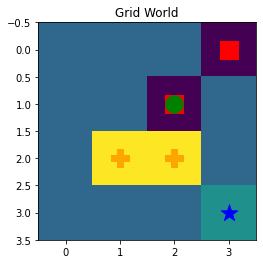

Timestep: 8

Current State: S3 = (0, 2) | Action = Up | Reward = 0 | Done = False | Terminated:False


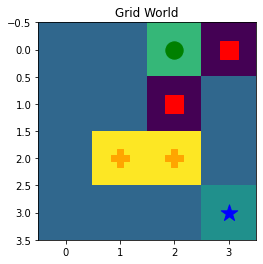

Timestep: 9

Current State: S4 = (0, 3) | Action = Right | Reward = -3 | Done = False | Terminated:False


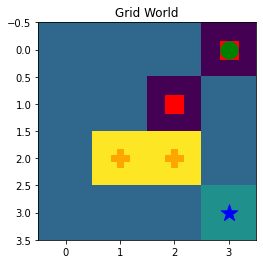

Timestep: 10

Current State: S8 = (1, 3) | Action = Down | Reward = 0 | Done = False | Terminated:True


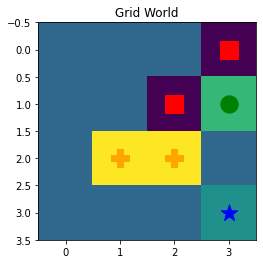

In [8]:
if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs = env.reset()
  terminated = False

  while not terminated:
    action = agent.step(obs)
    observation, reward, terminated, state, done, timestepCount = env.step(action)
    stateTup = tuple(state)
    print(f"Timestep: {timestepCount}")
    print(f"\nCurrent State: {statesEquivalent[stateTup]} = {stateTup} | Action = {actionsEquivalent[action]} | Reward = {reward} | Done = {done} | Terminated:{terminated}")
    env.render()

In [23]:
# SARSA algorithm for OpenAI Gym environment
def SARSA(env, testing, episodes, timesteps):
    env.reset()

    learningRate = 0.15
    discountFactor = 0.95

    initial_Q = np.zeros((env.observation_space.n, env.action_space.n))
    trained_Q = np.zeros((env.observation_space.n, env.action_space.n))

    testingEpisodes = 10
    episodes = episodes + testingEpisodes if testing else episodes
    epsilon = 1
    decayFactor = (0.01/1) ** (1/episodes)
    actionVals = [0, 1, 2, 3]
    rewardVals = []
    testingRewardVals = []
    optimalVals = []
    epsilonVals = []
    closeTarget = [(3, 2), (2, 3)]

    agentStates = {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3,
                   (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
                   (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
                   (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}

    def epsilon_greedy_policy(Q, state, epsilon):
        if np.random.random() < epsilon:
            return np.random.choice(actionVals)
        else:
            return np.argmax(Q[state])

    for eps in range(episodes):
        env.reset()
        currentState, rewardsTotal, timestep = 0, 0, 0
        currAction = epsilon_greedy_policy(trained_Q, currentState, epsilon)

        while timestep != timesteps:
            _, reward, _, agentState, done, _ = env.step(currAction)
            nextState = agentStates[tuple(agentState)]

            # when goal reached assign higher reward
            reward = reward + 110 if reward == 15 else reward
            # # When its about to reach the goal assign higher reward
            for agent in closeTarget:
                if (agent == agentState).all():
                    reward += 6 

            nextAction = epsilon_greedy_policy(trained_Q, nextState, epsilon)

            trained_Q[currentState][currAction] = trained_Q[currentState][currAction] + learningRate * \
                (reward + discountFactor * trained_Q[nextState]
                 [nextAction] - trained_Q[currentState][currAction])

            timestep += 1
            rewardsTotal += reward

            optimalVals.append(currentState) if eps == episodes-1 else None

            currentState = nextState
            currAction = nextAction

            if done:
                break

        epsilon = epsilon * decayFactor if epsilon > 0.01 else 0.01
        rewardVals.append(rewardsTotal)
        epsilonVals.append(epsilon)

        testingRewardVals.append(reward) if testing and eps > (
            episodes - testingEpisodes-1) else None

    currentStateEquivalent = {0: 'S1', 1: 'S2', 2: 'S3', 3: 'S4', 4: 'S5', 5: 'S6', 6: 'S7',
                              7: 'S8', 8: 'S9', 9: 'S10', 10: 'S11', 11: 'S12', 12: 'S13', 13: 'S14',
                              14: 'S15', 15: 'S16'}
    
    optimalVals.append(15)
    
    optimalPath = ""
    for path in optimalVals:
        pathState = currentStateEquivalent[path]
        optimalPath = optimalPath + " -> " + pathState

    return initial_Q, trained_Q, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, optimalPath

### Optimal Path

In [32]:
_, _, _, _, _, _, _, optimalPath = SARSA(
    env=GridEnvironment(), testing=False, episodes=1000, timesteps=10)
print(f"Optimal Path{optimalPath}")

Optimal Path -> S1 -> S5 -> S6 -> S10 -> S11 -> S15 -> S16


## Visualization

In [34]:
def visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals):
    # If in testing mode
    if len(testingRewardVals) != 0:
        plt.plot([e for e in range(testingEpisodes)], testingRewardVals)
        plt.title("Reward per Episode")
        plt.xlabel('Episode')
        plt.ylabel('Reward')
    # If in training mode
    else:
        fig, (p1, p2) = plt.subplots(1, 2, figsize=(10,4))
        p1.plot([episode for episode in range(episodes)], epsilonVals)
        p1.set_title("Epsilon decay")

        p2.plot([episode for episode in range(episodes)], rewardVals)
        p2.set_title("Reward per Episode")
        p2.set_xlabel('Episode')
        p2.set_ylabel('Reward')

### Initial Q-table and the trained Q-table

In [35]:
initial_Q, trained_Q, _, _, _, _, _, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=1000, timesteps=10)

print("Initial Q-Table: \n", initial_Q)
print("\nTrained Q-Table: \n", trained_Q)

Initial Q-Table: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Trained Q-Table: 
 [[ 7.93486092e+01  7.49313604e+01  1.05116389e+02  8.22737961e+01]
 [ 1.12239796e+02  9.39953719e+01  7.62414855e+01  7.11655568e+01]
 [ 1.01253102e+02  1.04475365e+01  3.99653734e+00  1.59742550e+01]
 [ 2.36979880e+01  2.58875457e+00 -1.23088781e+00 -2.21302465e-02]
 [ 1.04327803e+02  2.13368322e+01  2.98843710e+01  1.67086672e+01]
 [ 1.18311213e+02  8.17744208e+01  9.44860684e+01  7.31164553e+01]
 [ 1.18533955e+02  2.27096136e+01  3.19953315e+01  5.26163301e+01]
 [ 1.09535057e+02  2.06926786e+00  2.84143581e+01 -2.91329669e-01]
 [ 1.11573483e+01  1.84957261e+01  1.15450997e+02  4.04906735e+01]
 [ 8.86099640e+01  8.90277041e+01  1.22500103e+02  8.82915531e+01]
 [ 1.24749941e+02  8.96814723e+01  1.15096763e+02 

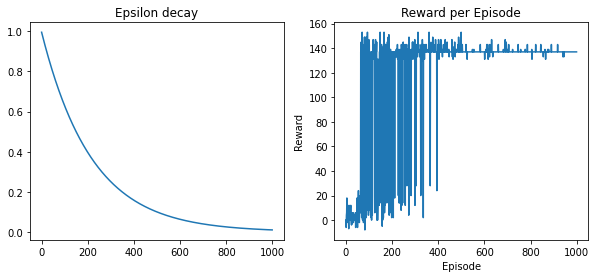

In [36]:
# visualization for training
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=1000, timesteps=10)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

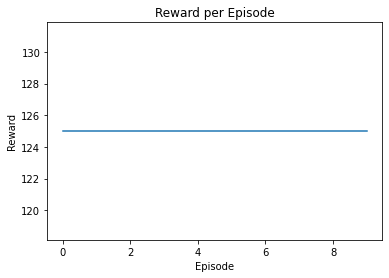

In [37]:
# visualization for testing
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=True, episodes=1000, timesteps=10)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

## Hyperparameter Tuning

### Hyperparameter 1 (Number of episodes)

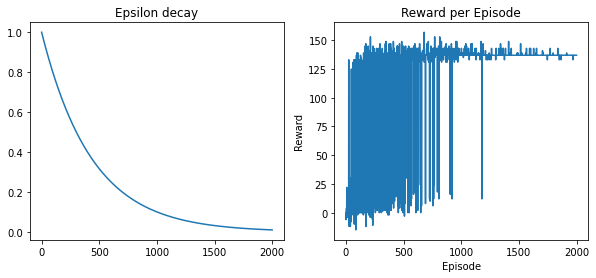

In [38]:
# Setting Number of episodes = 2000
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=2000, timesteps=10)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

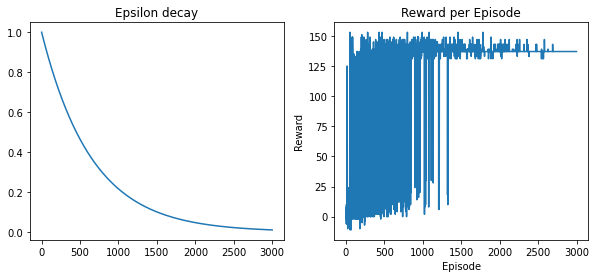

In [39]:
# Setting Number of episodes = 3000
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=3000, timesteps=10)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

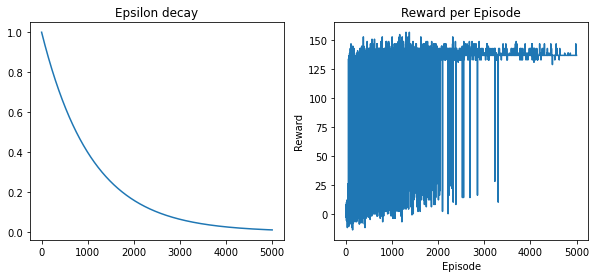

In [49]:
# Setting Number of episodes = 5000
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=5000, timesteps=10)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

### Hyperparameter 2 (Max timesteps)

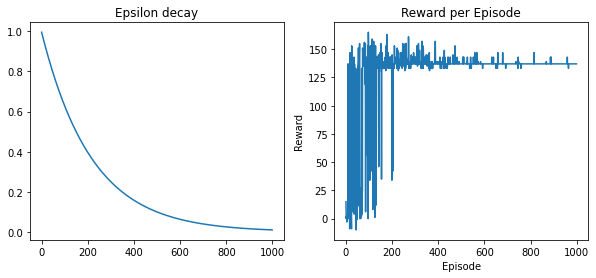

In [42]:
# Setting Number of timesteps = 20
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=1000, timesteps=20)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

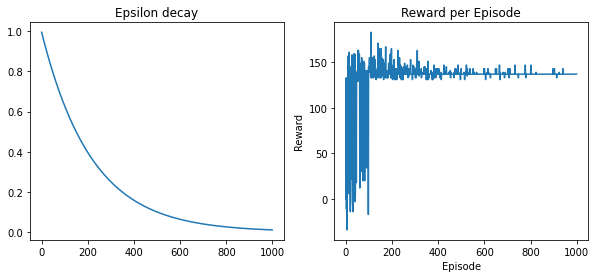

In [44]:
# Setting Number of timesteps = 30
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=1000, timesteps=30)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)

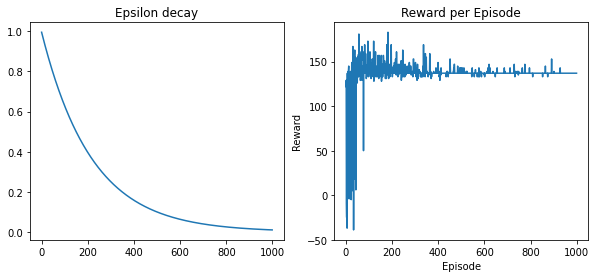

In [47]:
# Setting Number of timesteps = 40
_, _, testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals, _ = SARSA(
    env=GridEnvironment(), testing=False, episodes=1000, timesteps=40)
visualization(testingEpisodes, episodes, rewardVals, epsilonVals, testingRewardVals)